In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

pd.options.display.max_colwidth = 200
pd.options.display.max_rows = 205

# Creation of the main dataset

Creating the dataset with absorption speed, controls, and independent variables for each territory, with row = territory (from NUTS 0 to NUTS 2). In this file I merge all the preprocessed datasets together.

## Matching ABS with NUTS

**What I need:**
- one line per NUTS region with absorption speed (per santos)

**What to watch out for:**
- NUTS level (maybe i need to only include 1 and 2)
- duplicates among countries
- when looking for a string match, watch out for partial matches: RO42 -- "Vest" (present in words such as "Investment" and similar)

In [130]:
# Improting pre-processed datasets from ABS-14-20.ipynb AND nuts.ipynb

nuts = pd.read_csv("datasets/clean/nuts21.csv")
ab = pd.read_csv("datasets/clean/abs.csv")

In [131]:
ab[ab["CCI"] == "2014FR16M0OP007"].sort_values(by=["MS_name", "CCI", "year"])

,ms,MS_name,CCI,year,Fund,Programme Title,TO,EU_amount_planned,Total_Amount_planned,total_eligible_spending,Reference Date
1150,FR,France,2014FR16M0OP007,2016,ESF,Midi-Pyrénées et Garonne - ERDF/ESF/YEI,8,7 000 000,26 923 077,"87 745,72",31/12/2016
4277,FR,France,2014FR16M0OP007,2016,ERDF,Midi-Pyrénées et Garonne - ERDF/ESF/YEI,2,35 676 200,95 136 533,"3 116 254,18",31/12/2016
6298,FR,France,2014FR16M0OP007,2016,ERDF,Midi-Pyrénées et Garonne - ERDF/ESF/YEI,MULTI,35 676 300,86 551 835,"6 466 724,09",31/12/2016
15423,FR,France,2014FR16M0OP007,2016,YEI,Midi-Pyrénées et Garonne - ERDF/ESF/YEI,8,5 094 014,7 641 021,"1 820 341,76",31/12/2016
21254,FR,France,2014FR16M0OP007,2016,ERDF,Midi-Pyrénées et Garonne - ERDF/ESF/YEI,1,116 010 700,286 312 994,"4 351 174,64",31/12/2016
22344,FR,France,2014FR16M0OP007,2016,ERDF,Midi-Pyrénées et Garonne - ERDF/ESF/YEI,6,11 773 000,23 546 000,"169 926,99",31/12/2016
25005,FR,France,2014FR16M0OP007,2016,ESF,Midi-Pyrénées et Garonne - ERDF/ESF/YEI,10,60 823 000,121 646 000,"4 660 577,3",31/12/2016
30207,FR,France,2014FR16M0OP007,2016,ERDF,Midi-Pyrénées et Garonne - ERDF/ESF/YEI,4,63 424 400,239 789 792,"1 852 795,41",31/12/2016
31989,FR,France,2014FR16M0OP007,2016,ERDF,Midi-Pyrénées et Garonne - ERDF/ESF/YEI,10,24 775 200,49 550 400,0,31/12/2016
34531,FR,France,2014FR16M0OP007,2016,ERDF,Midi-Pyrénées et Garonne - ERDF/ESF/YEI,3,77 978 800,281 689 450,"31 058 659,89",31/12/2016


In [132]:
nuts.head(3)

,Country code,NUTS Code,NUTS label,NUTS level
0,BE,BE,Belgique/België,0.0
1,BE,BE1,Région de Bruxelles-Capitale/Brussels Hoofdstedelijk Gewest,1.0
2,BE,BE10,Région de Bruxelles-Capitale/ Brussels Hoofdstedelijk Gewest,2.0


In [133]:
ab.head(3)

,ms,MS_name,CCI,year,Fund,Programme Title,TO,EU_amount_planned,Total_Amount_planned,total_eligible_spending,Reference Date
0,FR,France,2014FR16M0OP007,2021,ESF,Midi-Pyrénées et Garonne - ERDF/ESF/YEI,8,8 500 000,17 000 000,"11 912 385,95",31/12/2021
1,FR,France,2014FR06RDRP052,2016,EAFRD,Pays de la Loire - Rural Development,1,13 250,25 000,0,31/12/2016
2,ES,Spain,2014ES06RDRP005,2022,EAFRD,Canarias - Rural Development,4,44 100,"51 882,36","1 142 109,04",31/12/2022


In [134]:
# Since an OP can be associated with multiple funds, TO and years, we extract unique OPs to
#   simplify the assiment process

unique_ops = ab[['CCI', 'Programme Title', 'ms']].drop_duplicates().copy()
unique_ops['Title_Clean'] = unique_ops['Programme Title'].str.upper()

nuts['NUTS_NAME_CLEAN'] = nuts['NUTS label'].str.upper()
nuts['Name_Length'] = nuts['NUTS label'].str.len()

In [135]:
nuts_by_country = {}

for country, group in nuts.groupby('Country code'):

    sorted_regions = group.sort_values('Name_Length', ascending=False)[['NUTS_NAME_CLEAN', 'NUTS Code']]

    nuts_by_country[country] = list(zip(sorted_regions['NUTS_NAME_CLEAN'], sorted_regions['NUTS Code']))

In [136]:
sorted_regions

,NUTS_NAME_CLEAN,NUTS Code
1535,BANSKOBYSTRICKÝ KRAJ,SK032
1541,EXTRA-REGIO NUTS 3,SKZZZ
1540,EXTRA-REGIO NUTS 2,SKZZ
1539,EXTRA-REGIO NUTS 1,SKZ
1536,VÝCHODNÉ SLOVENSKO,SK04
1533,STREDNÉ SLOVENSKO,SK03
1529,ZÁPADNÉ SLOVENSKO,SK02
1528,BRATISLAVSKÝ KRAJ,SK010
1527,BRATISLAVSKÝ KRAJ,SK01
1531,TRENČIANSKY KRAJ,SK022


In [137]:
nuts_by_country

{'AT': [('WESTLICHE OBERSTEIERMARK', 'AT226'),
  ('ÖSTLICHE OBERSTEIERMARK', 'AT223'),
  ('WEST- UND SÜDSTEIERMARK', 'AT225'),
  ('MOSTVIERTEL-EISENWURZEN', 'AT121'),
  ('RHEINTAL-BODENSEEGEBIET', 'AT342'),
  ('WIENER UMLAND/NORDTEIL', 'AT126'),
  ('BLUDENZ-BREGENZER WALD', 'AT341'),
  ('SALZBURG UND UMGEBUNG', 'AT323'),
  ('WIENER UMLAND/SÜDTEIL', 'AT127'),
  ('NIEDERÖSTERREICH-SÜD', 'AT122'),
  ('KLAGENFURT-VILLACH', 'AT211'),
  ('EXTRA-REGIO NUTS 3', 'ATZZZ'),
  ('EXTRA-REGIO NUTS 1', 'ATZ'),
  ('EXTRA-REGIO NUTS 2', 'ATZZ'),
  ('TIROLER UNTERLAND', 'AT335'),
  ('NIEDERÖSTERREICH', 'AT12'),
  ('TIROLER OBERLAND', 'AT334'),
  ('MITTELBURGENLAND', 'AT111'),
  ('STEYR-KIRCHDORF', 'AT314'),
  ('PINZGAU-PONGAU', 'AT322'),
  ('NORDBURGENLAND', 'AT112'),
  ('OBERÖSTERREICH', 'AT31'),
  ('WESTÖSTERREICH', 'AT3'),
  ('OSTÖSTERREICH', 'AT1'),
  ('OSTSTEIERMARK', 'AT224'),
  ('SÜDBURGENLAND', 'AT113'),
  ('SÜDÖSTERREICH', 'AT2'),
  ('UNTERKÄRNTEN', 'AT213'),
  ('SANKT PÖLTEN', 'AT123'),
  ('TR

In [138]:
# Function that checks each row of unique_ops with all the NUTS codes for the given ms, returns only
#   perfect matches or None

def match_nuts_strict(row):
    program_title = row['Title_Clean']
    country_code = row['ms']
    
    possible_regions = nuts_by_country.get(country_code, [])
    
    for name, nuts_id in possible_regions:
        if name in program_title:
            return nuts_id
            
    return None

In [139]:
unique_ops['Matched_NUTS'] = unique_ops.apply(match_nuts_strict, axis=1)

# Handle the "National/Centralized" fallback, if there was no match, we assume it to be a national program
unique_ops['Final_NUTS'] = unique_ops['Matched_NUTS'].fillna(unique_ops['ms'])
# Per Santos we consider all NUTS levels > 0 to be "decentralized"
unique_ops['Decentralized_Dummy'] = unique_ops['Final_NUTS'].apply(lambda x: 1 if len(str(x)) > 2 else 0)

In [140]:
unique_ops[unique_ops["Final_NUTS"] == "RO42"]

,CCI,Programme Title,ms,Title_Clean,Matched_NUTS,Final_NUTS,Decentralized_Dummy


### Manual fixes
- checking the programs not associated with a lowers NUTS unit (decentralized = 0) manually and if there is a specific name of a region in the title, I check the CCI through a dedicated lookup table in the nuts file and assign specific nuts code if applicable
- this is useful because otherwise regional programes would count towards national statistics and regional statistics would not be precise
- also covering different naming in our nuts dataset and absorption dataset (mainly issue of Sweden, Greece, Macedonia and Netherlands)

- I also need to double check the codes with my nuts2021 dataset since the lookup table uses nuts2010 -> after innital cleaning there were 13 OP that did not match with nuts2021, I manually looked up the name and assigned a new nuts code (marked with hashtag)

In [141]:
unique_ops.loc[unique_ops["Final_NUTS"] == "IE0", "Final_NUTS"] = "IE"

In [142]:
unique_ops[unique_ops["Decentralized_Dummy"] == 0]

,CCI,Programme Title,ms,Title_Clean,Matched_NUTS,Final_NUTS,Decentralized_Dummy
4,2014LT06RDNP001,Lithuania - National Rural Development,LT,LITHUANIA - NATIONAL RURAL DEVELOPMENT,None,LT,0
5,2014HR16M1OP001,Competitiveness and Cohesion - HR - ERDF/CF,HR,COMPETITIVENESS AND COHESION - HR - ERDF/CF,None,HR,0
8,2014MT06RDNP001,Malta - National Rural Development,MT,MALTA - NATIONAL RURAL DEVELOPMENT,MT,MT,0
12,2014AT06RDNP001,Austria - National Rural Development,AT,AUSTRIA - NATIONAL RURAL DEVELOPMENT,None,AT,0
16,2014SE16RFOP007,Central Norrland - ERDF,SE,CENTRAL NORRLAND - ERDF,None,SE,0
28,2014IT16M2OP004,Metrolitan Cities - IT - ERDF/ESF,IT,METROLITAN CITIES - IT - ERDF/ESF,None,IT,0
31,2014IT05SFOP001,Social Inclusion - IT - ESF,IT,SOCIAL INCLUSION - IT - ESF,None,IT,0
33,2014BE16RFOP002,Flanders - ERDF,BE,FLANDERS - ERDF,None,BE,0
35,2014HU16M2OP002,Competitive Central-Hungary - ERDF/ESF,HU,COMPETITIVE CENTRAL-HUNGARY - ERDF/ESF,None,HU,0
37,2014ES16RFOP013,Valenciana - ERDF,ES,VALENCIANA - ERDF,None,ES,0


In [143]:
changes = {"2014PL16M2OP016" : "PL42", 
           "2014SE16RFOP007" : "SE32", 
           "2014BE16RFOP002" : "BE2",
           "2014ES16RFOP013" : "ES52",
           "2014ES05SFOP005" : "ES53",
           "2014PT16M2OP004" : "PT200",
           "2014NL16RFOP003" : "NL4",
           "2014GR16M2OP002" : "EL52", # 
           "2014PT16M2OP005" : "PT17",
           "2014FR05SFOP005" : "FRY4", # La Réunion
           "2014GR16M2OP005" : "EL63", # 
           "2014NL16RFOP004" : "NL2",
           "2014PT16M2OP002" : "PT16",
           "2014GR16M2OP010" : "EL41",
           "2014BE05SFOP001" : "BE336",
           "2014PT16M2OP006" : "PT300",
           "2014FR16RFOP007" : "FRY4", # La Réunion
           "2014SE16RFOP008" : "SE33",
           "2014SE16RFOP006" : "SE31",
           "2014SE16RFOP002" : "SE21",
           "2014FR05M0OP001" : "FR10",
           "2014IT16RFOP005" : "ITH10",
           "2014CZ16M2OP001" : "CZ010",
           "2014GR16M2OP013" : "EL42",
           "2014GR16M2OP006" : "EL53", # 
           "2014GR16M2OP008" : "EL65", # 
           "2014FR16M0OP003" : "FRB0", # Centre-Val de Loire
           "2014PL16M2OP007" : "PL9", # MAKROREGION WOJEWÓDZTWO MAZOWIECKIE
           "2014SE16RFOP001" : "SE22",
           "2014PL16M2OP016" : "PL42",
           "2014IT05SFOP011" : "ITC2",
           "2014BE16RFOP003" : "BE3",
           "2014GR16M2OP004" : "EL54", #
           "2014NL16RFOP001" : "NL1",
           "2014GR16M2OP014" : "EL51", # 
           "2014GR16M2OP012" : "EL30",
           "2014GR16M2OP003" : "EL61", #
           "2014FR16M0OP013" : "FRL0", # Provences Alps Cote d'Azur
           "2014SE16RFOP004" : "SE12",
           "2014SE16RFOP003" : "SE23",
           "2014BE05M9OP002" : "BE1",
           "2014IT16RFOP020" : "ITC20",
           "2014NL16RFOP002" : "NL3",
           "2014GR16M2OP009" : "EL62", # Ionian Islands
           "2014BE16RFOP001" : "BE1",
           "2014GR16M2OP011" : "EL43",
           "2014ES05SFOP020" : "ES52",
           "2014IT05SFOP017" : "ITH1",
           "2014ES16RFOP006" : "ES53",
           "2014GR16M1OP001" : "EL",
           "2014GR05M9OP001" : "EL",
           "2014GR06RDNP001" : "EL",
           "2014GR16M2OP001" : "EL",
           "2014GR05M2OP001" : "EL",
           "2014GR16M2OP007" : "EL",
           "2014GR14MFOP001" : "EL",
          }

unique_ops["Final_NUTS"] = unique_ops["CCI"].map(changes).fillna(unique_ops["Final_NUTS"])

unique_ops["Decentralized_Dummy"] = unique_ops["Final_NUTS"].apply(lambda x: 1 if len(str(x)) > 2 else 0)

In [144]:
# Merging unique_ops with nuts dataset for comparison and NUTS level information

unique_ops = pd.merge(unique_ops, nuts, left_on="Final_NUTS", right_on="NUTS Code", how="left")[["CCI", "Programme Title", "ms", "Final_NUTS", "Decentralized_Dummy", "NUTS Code", "NUTS label", "NUTS level"]]

In [145]:
unique_ops.sample(10)

,CCI,Programme Title,ms,Final_NUTS,Decentralized_Dummy,NUTS Code,NUTS label,NUTS level
355,2014DE05SFOP003,Baden-Württemberg - ESF,DE,DE1,1,DE1,Baden-Württemberg,1.0
177,2014PT06RDRP002,Continental Portugal - Rural Development,PT,PT,0,PT,Portugal,0.0
226,2014ES05SFOP004,Asturias - ESF,ES,ES120,1,ES120,Asturias,3.0
13,2014FR06RDRP043,Franche-Comté - Rural Development,FR,FRC2,1,FRC2,Franche-Comté,2.0
164,2014IT05M2OP001,Education - IT - ESF/ERDF,IT,IT,0,IT,Italia,0.0
91,2014DE14MFOP001,Maritime and Fisheries - Germany,DE,DE,0,DE,Deutschland,0.0
256,2014RO16RFOP002,Integrated Regional Programme - RO - ERDF,RO,RO,0,RO,România,0.0
6,2014DE06RDRP004,Bayern - Rural Development,DE,DE2,1,DE2,Bayern,1.0
401,2015IT16RFSM001,SME Initiative - IT - ERDF,IT,IT,0,IT,Italia,0.0
166,2014IT16RFOP007,Campania - ERDF,IT,ITF3,1,ITF3,Campania,2.0


In [146]:
# Checking for NaN, which would mean that our unique_ops code does not match nuts2021 dataset

unique_ops["NUTS level"].value_counts(dropna=False)

NUTS level
2.0    191
0.0    157
1.0     47
3.0     31
Name: count, dtype: int64

In [147]:
unique_ops[unique_ops["NUTS level"].isna()]

,CCI,Programme Title,ms,Final_NUTS,Decentralized_Dummy,NUTS Code,NUTS label,NUTS level


### Meging ABS with NUTS codes
After the labels are assigned to the unique OPs we connect them with all the programs

In [148]:
ab_nuts = ab.merge(
    unique_ops[['CCI', 'Final_NUTS', 'Decentralized_Dummy', 'NUTS level']], 
    on='CCI', 
    how='left'
)

- removing programs on NUTS 3 level since we focus on NUTS 2 and above

In [149]:
ab_nuts = ab_nuts[~(ab_nuts["NUTS level"] == 3)]

In [150]:
ab_nuts

,ms,MS_name,CCI,year,Fund,Programme Title,TO,EU_amount_planned,Total_Amount_planned,total_eligible_spending,Reference Date,Final_NUTS,Decentralized_Dummy,NUTS level
0,FR,France,2014FR16M0OP007,2021,ESF,Midi-Pyrénées et Garonne - ERDF/ESF/YEI,8,8 500 000,17 000 000,"11 912 385,95",31/12/2021,FRJ2,1,2.0
1,FR,France,2014FR06RDRP052,2016,EAFRD,Pays de la Loire - Rural Development,1,13 250,25 000,0,31/12/2016,FRG,1,1.0
2,ES,Spain,2014ES06RDRP005,2022,EAFRD,Canarias - Rural Development,4,44 100,"51 882,36","1 142 109,04",31/12/2022,ES7,1,1.0
3,FR,France,2014FR05M9OP002,2016,ESF,Alsace - ESF/YEI,9,5 911 071,11 822 142,"267 976,5",31/12/2016,FRF1,1,2.0
4,LT,Lithuania,2014LT06RDNP001,2017,EAFRD,Lithuania - National Rural Development,1,"1 278 118,8","1 503 669,18",0,31/12/2017,LT,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48037,IT,Italy,2014IT06RDRP020,2021,EAFRD,Puglia - Rural Development,9,96 104 000,"158 849 586,35","71 552 368,8",31/12/2021,ITF4,1,2.0
48038,HR,Croatia,2014HR06RDNP001,2023,EAFRD,Croatia - National Rural Development,6,"106 128 536,86","122 306 657,05","124 068 300,96",31/12/2023,HR,0,0.0
48039,IT,Italy,2014IT06RDRP017,2018,EAFRD,Basilicata - Rural Development,5,"21 799 754,68","36 032 652,37","2 881 668,8",31/12/2018,ITF5,1,2.0
48040,PL,Poland,2014PL06RDNP001,2018,EAFRD,Poland - National Rural Development,3,1 771 902 689,"2 784 696 980,97","368 368 952,53",31/12/2018,PL,0,0.0


In [151]:
ab_nuts[ab_nuts["Final_NUTS"].isna()]

,ms,MS_name,CCI,year,Fund,Programme Title,TO,EU_amount_planned,Total_Amount_planned,total_eligible_spending,Reference Date,Final_NUTS,Decentralized_Dummy,NUTS level


In [152]:
ab_nuts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44814 entries, 0 to 48041
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ms                       44814 non-null  object 
 1   MS_name                  44814 non-null  object 
 2   CCI                      44814 non-null  object 
 3   year                     44814 non-null  int64  
 4   Fund                     44814 non-null  object 
 5   Programme Title          44814 non-null  object 
 6   TO                       44814 non-null  object 
 7   EU_amount_planned        44814 non-null  object 
 8   Total_Amount_planned     44814 non-null  object 
 9   total_eligible_spending  44814 non-null  object 
 10  Reference Date           44814 non-null  object 
 11  Final_NUTS               44814 non-null  object 
 12  Decentralized_Dummy      44814 non-null  int64  
 13  NUTS level               44814 non-null  float64
dtypes: float64(1), int64(2), ob

In [153]:
# Getting the number of programms per regions for controls

ab_nuts.groupby('Final_NUTS')['CCI'].nunique().reset_index().to_csv("./datasets/clean/nOfProg.csv", index=False)

In [154]:
ab_nuts.groupby('CCI')['Final_NUTS'].nunique().reset_index()

,CCI,Final_NUTS
0,2014AT05SFOP001,1
1,2014AT06RDNP001,1
2,2014AT14MFOP001,1
3,2014AT16RFOP001,1
4,2014BE05M9OP001,1
...,...,...
390,2014SK16M1OP002,1
391,2014SK16RFOP002,1
392,2015BG16RFSM001,1
393,2015IT16RFSM001,1


In [155]:
# As a control, checking the number of unique NUTS we have, Santos has 163, the cause of difference
# to be examined

len(ab_nuts.groupby(by="Final_NUTS").sum(numeric_only=True))

151

In [156]:
ab_nuts.to_csv("./datasets/clean/ab_nuts.csv", index=False)

## Calculating Absorption Variables
Now that we assigned NUTS code to each OP, we can move on with Santos methodology and calculate the speed of absorption. We will do it in three steps:
1. AAR = S / P : **annual cummulative absorption rate** (ratio between the cummulative expediture until time t for a territory i) and (the total EU ammount planned for the analyzed programming period)
2. AP = (sum{AAR}from 2016 to 2023) / number of years: **average performance of a territory**
3. GA = **AAR at the end of the period, in 2023**
4. SA = (AP * GA) * 100: **speed of absorption**

-> "The earlier in time Sit is closer to Pit, the larger the indicator SAit will be, since an AARit closer to 1 will appear with a higher frequency in our estimated average."

-> "because we are not only interested in the average performance (APi) but also in the overall level of expenditure in the last year (2022 (2023 in our case)), we corrected the APi by the level of absorption in 2022(2023). This step allows us to ensure that territories with a lower average performance but able to spend the full budget in 2022(2023) are better ranked than territories with good average performance but unable to spend the full budget until 2022(2023)"

In [157]:
# Formating relevant columns from object to floats

num_cols = ['EU_amount_planned', 'Total_Amount_planned', 'total_eligible_spending']

for col in num_cols:
    ab_nuts[col] = ab_nuts[col].astype(str)
    ab_nuts[col] = ab_nuts[col].str.replace(r'\xa0', '', regex=True).str.replace(' ', '')
    ab_nuts[col] = ab_nuts[col].str.replace(",", ".") 
    ab_nuts[col] = pd.to_numeric(ab_nuts[col], errors='coerce').fillna(0)


print(ab_nuts.dtypes)

ms                          object
MS_name                     object
CCI                         object
year                         int64
Fund                        object
Programme Title             object
TO                          object
EU_amount_planned          float64
Total_Amount_planned       float64
total_eligible_spending    float64
Reference Date              object
Final_NUTS                  object
Decentralized_Dummy          int64
NUTS level                 float64
dtype: object


- **S_it**: cumulative expenditure up to year t for territory i
- **P_it**: total EU planned amount for the analysed programming period for territory i

### Calculating S (since P = EU_amount_planned)

In [158]:
# A bit of an unnecessary step, since we could just use the totals, but 
# makes the EU participation clear

ab_nuts['co_financing_rate'] = ab_nuts['EU_amount_planned'] / ab_nuts['Total_Amount_planned']
ab_nuts['co_financing_rate'] = ab_nuts['co_financing_rate'].fillna(0)

ab_nuts['S_EU_Spending'] = ab_nuts['total_eligible_spending'] * ab_nuts['co_financing_rate']

In [159]:
ab_nuts[ab_nuts["Final_NUTS"].isnull()]

,ms,MS_name,CCI,year,Fund,Programme Title,TO,EU_amount_planned,Total_Amount_planned,total_eligible_spending,Reference Date,Final_NUTS,Decentralized_Dummy,NUTS level,co_financing_rate,S_EU_Spending


In [160]:
ab_nuts[(ab_nuts["CCI"] == "2014EE16M3OP001") & (ab_nuts["TO"] == "2")]

,ms,MS_name,CCI,year,Fund,Programme Title,TO,EU_amount_planned,Total_Amount_planned,total_eligible_spending,Reference Date,Final_NUTS,Decentralized_Dummy,NUTS level,co_financing_rate,S_EU_Spending
1912,EE,Estonia,2014EE16M3OP001,2023,ERDF,Cohesion Policy Funding - EE - ERDF/ESF/CF,2,79175270.0,93147377.0,89651733.02,31/12/2023,EE,0,0.0,0.85,7.620397e+07
5000,EE,Estonia,2014EE16M3OP001,2017,ERDF,Cohesion Policy Funding - EE - ERDF/ESF/CF,2,84435976.0,99336443.0,44649516.50,31/12/2017,EE,0,0.0,0.85,3.795209e+07
11325,EE,Estonia,2014EE16M3OP001,2018,ERDF,Cohesion Policy Funding - EE - ERDF/ESF/CF,2,84435976.0,99336443.0,57724423.16,31/12/2018,EE,0,0.0,0.85,4.906576e+07
15379,EE,Estonia,2014EE16M3OP001,2019,ERDF,Cohesion Policy Funding - EE - ERDF/ESF/CF,2,84435976.0,99336443.0,70787629.98,31/12/2019,EE,0,0.0,0.85,6.016949e+07
17136,EE,Estonia,2014EE16M3OP001,2020,ERDF,Cohesion Policy Funding - EE - ERDF/ESF/CF,2,79175270.0,93147377.0,79554913.83,31/12/2020,EE,0,0.0,0.85,6.762168e+07
28820,EE,Estonia,2014EE16M3OP001,2022,ERDF,Cohesion Policy Funding - EE - ERDF/ESF/CF,2,79175270.0,93147377.0,86822697.84,31/12/2022,EE,0,0.0,0.85,7.379929e+07
29130,EE,Estonia,2014EE16M3OP001,2016,ERDF,Cohesion Policy Funding - EE - ERDF/ESF/CF,2,84574468.0,99499375.0,25939294.94,31/12/2016,EE,0,0.0,0.85,2.204840e+07
31855,EE,Estonia,2014EE16M3OP001,2021,ERDF,Cohesion Policy Funding - EE - ERDF/ESF/CF,2,79175270.0,93147377.0,83145155.63,31/12/2021,EE,0,0.0,0.85,7.067338e+07


In [161]:
ab_nuts.sample(10)

,ms,MS_name,CCI,year,Fund,Programme Title,TO,EU_amount_planned,Total_Amount_planned,total_eligible_spending,Reference Date,Final_NUTS,Decentralized_Dummy,NUTS level,co_financing_rate,S_EU_Spending
36733,IT,Italy,2014IT06RDRP017,2016,EAFRD,Basilicata - Rural Development,10,150000.00,2.479339e+05,0.000000e+00,31/12/2016,ITF5,1,2.0,0.605000,0.000000e+00
47933,IT,Italy,2014IT06RDRP016,2022,EAFRD,Sardegna - Rural Development,5,1394365.00,2.904927e+06,1.569290e+06,31/12/2022,ITG2,1,2.0,0.480000,7.532591e+05
39560,LT,Lithuania,2014LT06RDNP001,2017,EAFRD,Lithuania - National Rural Development,6,56544254.00,7.539259e+07,4.528900e+07,31/12/2017,LT,0,0.0,0.749998,3.396663e+07
22540,PL,Poland,2014PL06RDNP001,2018,EAFRD,Poland - National Rural Development,10,5535854.00,8.700069e+06,0.000000e+00,31/12/2018,PL,0,0.0,0.636300,0.000000e+00
43521,IT,Italy,2014IT06RDRP003,2018,EAFRD,Emilia-Romagna - Rural Development,3,3477959.00,8.065768e+06,1.872631e+06,31/12/2018,ITH5,1,2.0,0.431200,8.074783e+05
21633,PL,Poland,2014PL06RDNP001,2022,EAFRD,Poland - National Rural Development,4,50904000.00,8.000000e+07,0.000000e+00,31/12/2022,PL,0,0.0,0.636300,0.000000e+00
22391,IT,Italy,2014IT06RDRP007,2023,EAFRD,Lombardia - Rural Development,4,49704414.33,1.152702e+08,1.123799e+08,31/12/2023,ITC4,1,2.0,0.431199,4.845814e+07
32901,IT,Italy,2014IT06RDRP010,2017,EAFRD,Toscana - Rural Development,3,31434.00,7.289888e+04,3.207771e+04,31/12/2017,ITI1,1,2.0,0.431200,1.383191e+04
40451,FR,France,2014FR06RDRP026,2023,EAFRD,Bourgogne - Rural Development,4,14070951.00,2.011011e+07,1.008769e+07,31/12/2023,FRC1,1,2.0,0.699695,7.058307e+06
42954,ES,Spain,2014ES06RDRP007,2018,EAFRD,Castilla-La Mancha - Rural Development,3,62798744.10,8.373166e+07,8.533567e+06,31/12/2018,ES42,1,2.0,0.750000,6.400176e+06


### Aggregating NUTS

In [162]:
# We can SUM because we aggregate by year, so it is okay despite the data being cummulative

agg_rules = {
    'EU_amount_planned': 'sum',   # Sum of all programs in the region = P
    'S_EU_Spending': 'sum',       # Sum of all spending in the region = S
    'Decentralized_Dummy': 'max', # Should be constant for the region (1 or 0)
    'NUTS level': 'first',        # Should be constant for the region (0 to 3)
    'ms': 'first'                 # Keep the country code
}
# Group by Region (Unit) and Year (Time)
panel_df = ab_nuts.groupby(['Final_NUTS', 'year']).agg(agg_rules).reset_index()

# Rename for clarity
panel_df = panel_df.rename(columns={
    'Final_NUTS': 'Region_ID',
    'EU_amount_planned': 'P_Planned_EU',
    'S_EU_Spending': 'S_Cumulative_Spent_EU'
})

In [163]:
panel_df.tail(20)

,Region_ID,year,P_Planned_EU,S_Cumulative_Spent_EU,Decentralized_Dummy,NUTS level,ms
1188,SE33,2020,2.023407e+08,1.311959e+08,1,2.0,SE
1189,SE33,2021,2.023407e+08,1.659064e+08,1,2.0,SE
1190,SE33,2022,2.023407e+08,1.809537e+08,1,2.0,SE
1191,SE33,2023,2.023407e+08,1.958952e+08,1,2.0,SE
1192,SI,2016,3.728060e+09,2.287641e+08,0,0.0,SI
1193,SI,2017,3.784086e+09,3.846893e+08,0,0.0,SI
1194,SI,2018,3.784086e+09,1.022838e+09,0,0.0,SI
1195,SI,2019,3.777818e+09,1.458848e+09,0,0.0,SI
1196,SI,2020,3.777125e+09,2.133770e+09,0,0.0,SI
1197,SI,2021,4.089509e+09,3.052437e+09,0,0.0,SI


In [164]:
# Calculate Cumulative Absorption Rate
panel_df['AAR_Cumulative'] = panel_df['S_Cumulative_Spent_EU'] / panel_df['P_Planned_EU']

# Handle edge cases (e.g., if Planned is 0, replace inf with 0), should not be neccesary, but a safety
panel_df['AAR_Cumulative'] = panel_df['AAR_Cumulative'].replace([np.inf, -np.inf], 0).fillna(0)

# Multiply by 100 to get percentage
panel_df['AAR_Cumulative'] = panel_df['AAR_Cumulative'] * 100

In [165]:
# Checking the values for the final year, most in the range of 90-100, total range 60-182

panel_df[panel_df["year"] == 2023]

,Region_ID,year,P_Planned_EU,S_Cumulative_Spent_EU,Decentralized_Dummy,NUTS level,ms,AAR_Cumulative
7,AT,2023,6.181359e+09,5.620221e+09,0,0.0,AT,90.922093
15,BE,2023,1.912115e+09,1.654999e+09,0,0.0,BE,86.553360
23,BE1,2023,1.392438e+08,1.402855e+08,1,1.0,BE,100.748111
31,BE2,2023,1.686495e+08,1.638874e+08,1,1.0,BE,97.176356
39,BE3,2023,6.720281e+08,7.119385e+08,1,1.0,BE,105.938794
47,BG,2023,1.000704e+10,9.378106e+09,0,0.0,BG,93.715112
55,CY,2023,9.545207e+08,9.071710e+08,0,0.0,CY,95.039427
63,CZ,2023,2.351728e+10,2.387547e+10,0,0.0,CZ,101.523117
71,DE,2023,2.782866e+09,2.727227e+09,0,0.0,DE,98.000667
79,DE1,2023,1.451001e+09,1.385285e+09,1,1.0,DE,95.470975


In [166]:
# Extracting Fond Size/ Planned EU allocation for controls

panel_df[panel_df["year"] == 2023][["Region_ID", "P_Planned_EU"]].to_csv("./datasets/clean/fondSize.csv", index=False)

In [167]:
panel_df[panel_df["year"] == 2023]["AAR_Cumulative"].describe()

count    151.000000
mean      96.023911
std       17.628418
min       60.159393
25%       86.344671
50%       96.814524
75%      102.155053
max      182.320924
Name: AAR_Cumulative, dtype: float64

In [168]:
# Final step: calculating AP and SA

start_year = 2016
final_year = 2023

df_period = panel_df[
    (panel_df['year'] >= start_year) & 
    (panel_df['year'] <= final_year)
].copy()

# "The average of the cumulative absorption rates over the years"
ap_df = df_period.groupby('Region_ID')['AAR_Cumulative'].mean().reset_index()
ap_df.rename(columns={'AAR_Cumulative': 'AP'}, inplace=True)

# "The total absorption rate achieved at the very end"
ga_df = df_period[df_period['year'] == final_year][['Region_ID', 'AAR_Cumulative']].copy()
ga_df.rename(columns={'AAR_Cumulative': 'GA'}, inplace=True)

final_df = pd.merge(ap_df, ga_df, on='Region_ID', how='inner')

# FORMULA: SA = (AP * GA) * 100
final_df['SA'] = ( (final_df['AP'] / 100) * (final_df['GA'] / 100) ) * 100

controls = panel_df.groupby('Region_ID')[['ms', 'Decentralized_Dummy', 'NUTS level']].first().reset_index()
final_df = final_df.merge(controls, on='Region_ID', how='left')

In [169]:
final_df

,Region_ID,AP,GA,SA,ms,Decentralized_Dummy,NUTS level
0,AT,60.336442,90.922093,54.859156,AT,0,0.0
1,BE,45.144179,86.553360,39.073804,BE,0,0.0
2,BE1,52.658794,100.748111,53.052741,BE,1,1.0
3,BE2,50.394916,97.176356,48.971944,BE,1,1.0
4,BE3,41.235006,105.938794,43.683868,BE,1,1.0
5,BG,46.912808,93.715112,43.964391,BG,0,0.0
6,CY,51.110836,95.039427,48.575445,CY,0,0.0
7,CZ,50.556807,101.523117,51.326846,CZ,0,0.0
8,DE,58.707529,98.000667,57.533770,DE,0,0.0
9,DE1,58.529510,95.470975,55.878694,DE,1,1.0


In [170]:
final_df.to_csv("./datasets/clean/nuts_abs.csv", index=False)

### Simple plot
Confirm heterogeneity and compare with Santos

Text(0.5, 1.0, 'Absorption Speed across regions')

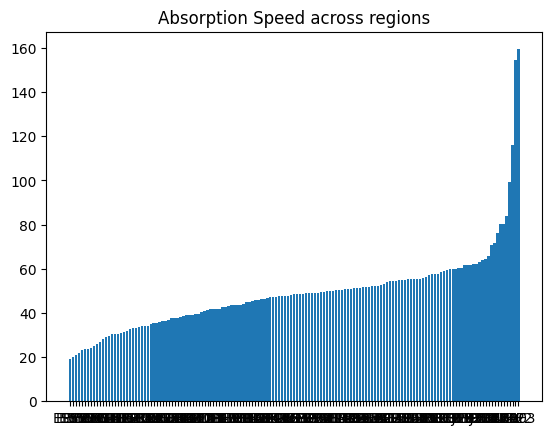

In [171]:
plt.bar(final_df.sort_values(by="SA")["Region_ID"], final_df.sort_values(by="SA")["SA"], )
plt.title("Absorption Speed across regions")

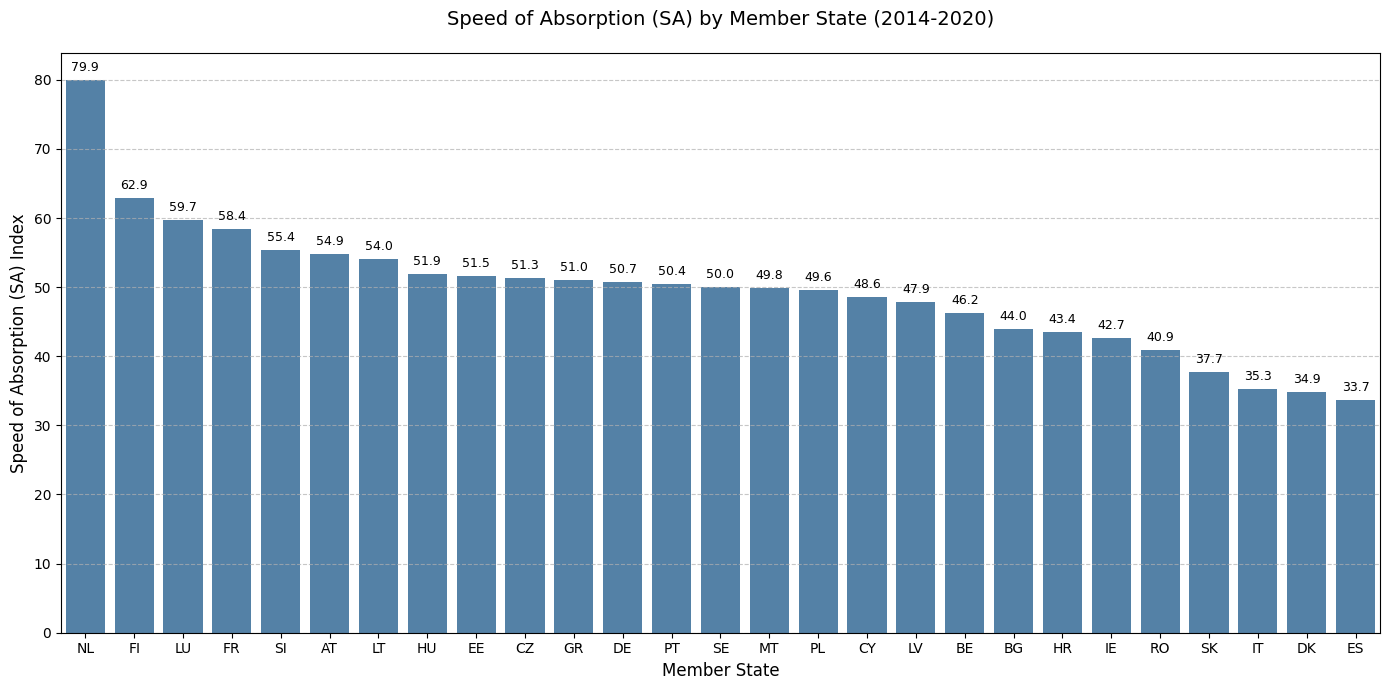

In [172]:
import seaborn as sns

# ---------------------------------------------------------
# 1. PREPARE THE DATA (Aggregate to Country Level)
# ---------------------------------------------------------
# Calculate the Mean SA per Country
# Note: You might want to use a weighted average by budget size if you want to be precise,
# but a simple mean is standard for this type of "Performance by MS" chart.
country_stats = final_df.groupby('ms')['SA'].mean().reset_index()

# Sort by SA (Highest to Lowest) to match the "ranking" style of Figure 1
country_stats = country_stats.sort_values('SA', ascending=False)

# ---------------------------------------------------------
# 2. CREATE THE PLOT
# ---------------------------------------------------------
plt.figure(figsize=(14, 7))

# Create the Bar Chart
# We use a clean color (steelblue) similar to academic publications
ax = sns.barplot(
    data=country_stats, 
    x='ms', 
    y='SA', 
    color='#4682B4' # SteelBlue
)

# ---------------------------------------------------------
# 3. FORMATTING (To make it look like a Paper Figure)
# ---------------------------------------------------------
plt.title('Speed of Absorption (SA) by Member State (2014-2020)', fontsize=14, pad=20)
plt.xlabel('Member State', fontsize=12)
plt.ylabel('Speed of Absorption (SA) Index', fontsize=12)

# Add horizontal grid lines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional: Add the value on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=9)

# Clean up the layout
plt.tight_layout()

# Save it (optional)
plt.savefig('./graphs/SA_by_Country.png', dpi=300)

# Show it
plt.show()

## Controls: Quality of Governance
Proxy for the institutional quality. Data cleaned in the qog.ipynb file.

In [173]:
qog = pd.read_csv("./datasets/clean/qog_clean.csv")

In [174]:
qog_merge = pd.merge(final_df, qog, on="Region_ID", how="left")

In [175]:
qog_merge

,Region_ID,AP,GA,SA,ms,Decentralized_Dummy,NUTS level,QoG
0,AT,60.336442,90.922093,54.859156,AT,0,0.0,0.859946
1,BE,45.144179,86.553360,39.073804,BE,0,0.0,0.676270
2,BE1,52.658794,100.748111,53.052741,BE,1,1.0,0.102000
3,BE2,50.394916,97.176356,48.971944,BE,1,1.0,1.100000
4,BE3,41.235006,105.938794,43.683868,BE,1,1.0,0.064000
5,BG,46.912808,93.715112,43.964391,BG,0,0.0,-1.725657
6,CY,51.110836,95.039427,48.575445,CY,0,0.0,0.070000
7,CZ,50.556807,101.523117,51.326846,CZ,0,0.0,-0.411132
8,DE,58.707529,98.000667,57.533770,DE,0,0.0,0.811481
9,DE1,58.529510,95.470975,55.878694,DE,1,1.0,0.914000


In [176]:
final_df = qog_merge.copy()

Text(0.5, 1.0, 'QoG Across Regions')

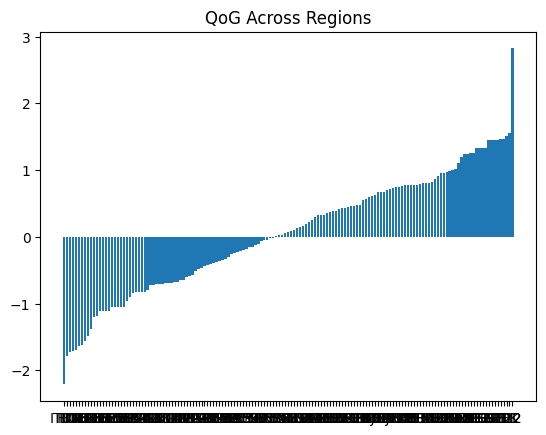

In [177]:
plt.bar(final_df.sort_values(by="QoG")["Region_ID"], final_df.sort_values(by="QoG")["QoG"], )
plt.title("QoG Across Regions")

## Controls
Various measures from the original dataset and Eurostat. Data prepared in eurostat_controls.ipynb file.

In [178]:
ctrl = pd.read_csv("./datasets/clean/controls.csv")

In [179]:
final_df = pd.merge(final_df, ctrl, on="Region_ID", how="left").copy()

In [180]:
final_df

,Region_ID,AP,GA,SA,ms,Decentralized_Dummy,NUTS level,QoG,num_prog,gdpc,unpl,dens_log,edu,share_agri,share_ind,plan_log
0,AT,60.336442,90.922093,54.859156,AT,0,0.0,0.859946,4,38600.0,5.6,4.641502,29.9,0.014349,0.227004,22.544804
1,BE,45.144179,86.553360,39.073804,BE,0,0.0,0.676270,5,36000.0,8.5,5.912421,36.9,0.007129,0.167180,21.371476
2,BE1,52.658794,100.748111,53.052741,BE,1,1.0,0.102000,2,64500.0,18.3,8.898284,43.5,0.000223,0.055502,18.751737
3,BE2,50.394916,97.176356,48.971944,BE,1,1.0,1.100000,1,36200.0,5.1,6.177529,37.2,0.009015,0.199262,18.943333
4,BE3,41.235006,105.938794,43.683868,BE,1,1.0,0.064000,1,26000.0,11.9,5.365041,33.9,0.008060,0.178463,20.325811
5,BG,46.912808,93.715112,43.964391,BG,0,0.0,-1.725657,10,6100.0,11.4,4.194190,27.0,0.052561,0.226058,23.026554
6,CY,51.110836,95.039427,48.575445,CY,0,0.0,0.070000,4,20500.0,16.1,4.527209,40.3,0.021047,0.071142,20.676720
7,CZ,50.556807,101.523117,51.326846,CZ,0,0.0,-0.411132,8,15100.0,6.1,4.914858,21.5,0.026434,0.314508,23.881001
8,DE,58.707529,98.000667,57.533770,DE,0,0.0,0.811481,2,36100.0,5.0,5.422745,27.1,0.010048,0.254666,21.746747
9,DE1,58.529510,95.470975,55.878694,DE,1,1.0,0.914000,3,41500.0,3.1,5.699105,29.8,0.006111,0.342568,21.095520


## Independent Variables

In [181]:
ches = pd.read_csv("./datasets/clean/ches_regional.csv")
vparty = pd.read_csv("./datasets/clean/vparty_regional.csv")

In [182]:
vparty.head(2)

,Region_ID,v2xpa_popul_weighted,v2pagovsup_weighted
0,AT,0.331800,1.570333
1,BE,0.312126,1.835121


In [183]:
ches.head(2)

,Region_ID,eu_position_weighted,lrgen_weighted,lrecon_weighted
0,AT,4.915934,5.989361,5.136636
1,BE,5.599646,5.477197,5.414862


In [184]:
final_df = pd.merge(final_df, ches, on="Region_ID", how="right")

In [185]:
final_df = pd.merge(final_df, vparty, on="Region_ID", how="left")

## Fund shares

In [186]:
fs = pd.read_csv("./datasets/clean/fund_shares.csv")

In [187]:
final_df = pd.merge(final_df, fs, left_on="Region_ID", right_on="Final_NUTS", how="left")

In [188]:
final_df.to_csv("./datasets/clean/final_df.csv", index=False)

In [189]:
final_df

,Region_ID,AP,GA,SA,ms,Decentralized_Dummy,NUTS level,QoG,num_prog,gdpc,...,plan_log,eu_position_weighted,lrgen_weighted,lrecon_weighted,v2xpa_popul_weighted,v2pagovsup_weighted,Final_NUTS,prop_EAFRD,prop_ESF,prop_OTHER
0,AT,60.336442,90.922093,54.859156,AT,0,0.0,0.859946,4,38600.0,...,22.544804,4.915934,5.989361,5.136636,0.331800,1.570333,AT,0.822503,0.078546,0.001283
1,BE,45.144179,86.553360,39.073804,BE,0,0.0,0.676270,5,36000.0,...,21.371476,5.599646,5.477197,5.414862,0.312126,1.835121,BE,0.410883,0.506395,0.082722
2,BE1,52.658794,100.748111,53.052741,BE,1,1.0,0.102000,2,64500.0,...,18.751737,5.902877,4.711215,4.834071,0.192366,1.621079,BE1,0.000000,0.251288,0.118198
3,BE2,50.394916,97.176356,48.971944,BE,1,1.0,1.100000,1,36200.0,...,18.943333,5.450439,6.163918,5.976438,0.403006,2.069075,BE2,0.000000,0.000000,0.000000
4,BE3,41.235006,105.938794,43.683868,BE,1,1.0,0.064000,1,26000.0,...,20.325811,5.877322,3.996001,4.182051,0.151687,1.417581,BE3,0.000000,0.000000,0.000000
5,BG,46.912808,93.715112,43.964391,BG,0,0.0,-1.725657,10,6100.0,...,23.026554,5.785391,5.095496,4.917329,0.410929,1.527400,BG,0.266666,0.137594,0.245067
6,CY,51.110836,95.039427,48.575445,CY,0,0.0,0.070000,4,20500.0,...,20.676720,5.567848,5.314265,5.579737,0.509730,1.801456,CY,0.169636,0.144298,0.364451
7,CZ,50.556807,101.523117,51.326846,CZ,0,0.0,-0.411132,8,15100.0,...,23.881001,4.680594,5.213660,4.991212,0.411275,1.704593,CZ,0.111446,0.147062,0.252714
8,DE,58.707529,98.000667,57.533770,DE,0,0.0,0.811481,2,36100.0,...,21.746747,5.594399,5.113758,4.996227,0.196714,1.397356,DE,0.000000,0.924163,0.075837
9,DE1,58.529510,95.470975,55.878694,DE,1,1.0,0.914000,3,41500.0,...,21.095520,5.754355,5.204263,5.206401,0.185915,1.335871,DE1,0.621200,0.195350,0.000000


In [190]:
final_df.columns

Index(['Region_ID', 'AP', 'GA', 'SA', 'ms', 'Decentralized_Dummy',
       'NUTS level', 'QoG', 'num_prog', 'gdpc', 'unpl', 'dens_log', 'edu',
       'share_agri', 'share_ind', 'plan_log', 'eu_position_weighted',
       'lrgen_weighted', 'lrecon_weighted', 'v2xpa_popul_weighted',
       'v2pagovsup_weighted', 'Final_NUTS', 'prop_EAFRD', 'prop_ESF',
       'prop_OTHER'],
      dtype='object')